In [1]:
import os
import glob
import shutil
import argparse
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from libs.helper_func import vid2images, images2vid
from libs.face import FaceDetector, FaceLandmarksDetector
from libs.iris import IrisDetector
import torch

face_detector = FaceDetector()

face_landmarks_detector = FaceLandmarksDetector()
iris_detector = IrisDetector()
iris_detector.iris_detector.to('cuda')
pass

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

2025-10-28 01:49:14.827397: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1761583759.110470 3188988 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1761583759.175067 3189186 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 550.54.14), renderer: NVIDIA RTX A6000/PCIe/SSE2
I0000 00:00:1761583759.182411 3188988 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1761583759.211745 3189182 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1761583759.267923 3189240 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 

Loaded from checkpoint file ~


In [ ]:
from PIL import ImageDraw

def draw_points(draw, pts, color, r=2):
    for x, y in np.rint(pts).astype(int):
        draw.ellipse((x - r, y - r, x + r, y + r), fill=color)

def demo(input_image):

    # face_detections = face_detector.predict(input_image)
    # face_detector.visualize(input_image, face_detections)
    face_landmarks_detections = face_landmarks_detector.predict(input_image)
    # face_landmarks_detector.visualize(input_image, face_landmarks_detections)
    # print(f"Number of faces detected: {len(face_landmarks_detections)}")
    print(face_landmarks_detections)
    for face_landmarks_detection in face_landmarks_detections:
        left_eye_image, right_eye_image, left_config, right_config = iris_detector.preprocess(input_image, face_landmarks_detection)

        left_eye_contour, left_eye_iris = iris_detector.predict((left_eye_image), isLeft=True)
        right_eye_contour, right_eye_iris = iris_detector.predict((right_eye_image), isLeft=False)

        # fig, [ax1, ax2] = plt.subplots(1,2)        
        # ax1.imshow(right_eye_image)
        # ax1.scatter(right_eye_iris[:, 0], right_eye_iris[:, 1], s=3)
        # ax1.scatter(right_eye_contour[:, 0], right_eye_contour[:, 1], s=3)
        # ax1.set(title='right eye')
        # ax2.imshow(left_eye_image)
        # ax2.scatter(left_eye_iris[:, 0], left_eye_iris[:, 1], s=3)
        # ax2.scatter(left_eye_contour[:, 0], left_eye_contour[:, 1], s=3)
        # ax2.set(title='left eye')
        # plt.show()


        pil = Image.fromarray(input_image)
        draw = ImageDraw.Draw(pil)
        
        ori_left_eye_contour, ori_left_iris = iris_detector.postprocess(left_eye_contour, left_eye_iris, left_config)
        ori_right_eye_contour, ori_right_iris = iris_detector.postprocess(right_eye_contour, right_eye_iris, right_config)

        print('Left iris points:', ori_left_iris)
        print(f"{ori_left_iris.shape}")
        # draw_points(draw, ori_left_eye_contour, color='blue', r=2)
        draw_points(draw, ori_left_iris[:, :2], color='red', r=2)
        # draw_points(draw, ori_right_eye_contour, color='blue', r=2)
        draw_points(draw, ori_right_iris[:, :2], color='red', r=2)
        plt.imshow(np.array(pil))

        # plt.imshow(input_image)
        # # plt.scatter(ori_left_eye_contour[:, 0], ori_left_eye_contour[:, 1], s=3)
        # plt.scatter(ori_left_iris[:, 0], ori_left_iris[:, 1], s=3)
        # # plt.scatter(ori_right_eye_contour[:, 0], ori_right_eye_contour[:, 1], s=3)
        # plt.scatter(ori_right_iris[:, 0], ori_right_iris[:, 1], s=3)
        # save_img_fname = 'demo_result.png'
        # plt.savefig(save_img_fname)
        # plt.show()
        # plt.close()

[array([[573.08003008, 407.85843581, -26.72699951],
       [580.91019392, 371.06293291, -53.13264392],
       [575.14053285, 382.17254877, -26.00644417],
       ...,
       [604.88538742, 279.50950563,  18.60355949],
       [592.55798757, 292.89912581,  18.60355949],
       [607.37486184, 304.24329042,  18.60355949]])]
Left iris points: [[612.76177979 292.06575775 -22.10088587]
 [618.84727859 290.55225754 -22.17754459]
 [611.28489304 285.53647995 -22.14025402]
 [606.70116806 293.550457   -22.1393683 ]
 [614.31378937 298.64337158 -22.19629765]]
(5, 3)


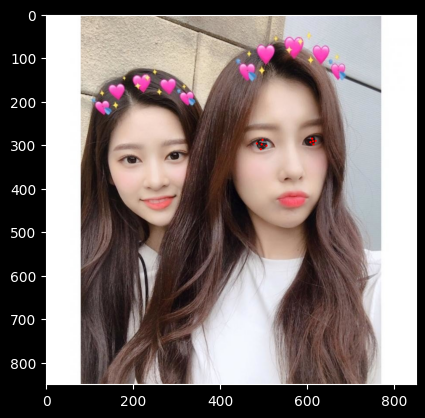

In [12]:

# input_image = np.array(Image.open('./examples/01.png').convert('RGB'))
# input_image = np.array(Image.open('/mnt/data2/dataset/VGGface2_None_norm_512_true_bygfpgan/n000004/0060_01.jpg').convert('RGB'))
path = '/mnt/data3/jiwon/MediaPipe_Iris/image.png'
input_image = np.array(Image.open(path).convert('RGB'))
demo(input_image)